# Analysis of Murders in States with Strict/Lenient Gun Laws

#### Nicholas Carrolli, Charles Adams, William Spencer 

## Overview 

The topic of gun laws often comes up in discussion, and it is an important topic to be educated on if you are a United States citizen. As more and more gun related incidents happen in the US, guns laws have become a point of contention for many people and a detailed analysis will shed light on approaches taken by different states. This analysis shows different ways of using data to compare states with strict gun laws to ones with lenient gun laws, and provides insight on the pros and cons of living in one of these states. Nick Carrolli sections 1-3, Charles Adams 4&5 and William Spencer 5&6 + all added analysis.

# Part 0: Helper Methods

This section is reserved for the various helper methods I used in this analysis. I've made a section for it to make the code easier to read later in the anaylsis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import itertools

#Defines a binary variable which determines if the given murder was committed by a firearm or not
def is_shooting_crime(row):
    if row['Weapon'] == 'Handgun' or row['Weapon'] == 'Firearm' or row['Weapon'] == 'Shotgun' or row['Weapon'] == 'Gun' or row['Weapon'] == 'Rifle':
        return 1
    else:
        return 0
    
#Returns the yearly count of murders by year
def yearly_count(df):
    df = df.copy().groupby(df['Year'], as_index=True, group_keys=True).count()
    count = df[['Record ID']].reset_index()
    count = count.rename(index=str, columns={'Record ID' : 'Count'})
    return count   

#Defines a binary variable which determines if the given state has strict gun laws
def is_strict(row):
    if row['State'] == "Texas" or row['State'] == "Florida" or row['State'] == "Georgia":
        return 1
    else:
        return 0

#Helper method that connects dots in a scatter plot, and colors it based on the type of gun laws the state has    
def connect_dots(df):
    i = 0
    states = df['State'].drop_duplicates()
    df = df.set_index('State')
    year = 2006 
    
    for s in states:
      
        curr_year = df[df['Year'] == year]
        if s in curr_year.index:
            if df['Is_Strict'].values[i] == 1:
                col = "red"
            else:
                col = "blue"
            i = i + 1
            plt.plot(df.loc[s, 'Year'], df.loc[s, "Total Deaths"], color = col)
            if (year < 2018):
                year = year + 1
            else:
                year = 2006

    

# Part 1: Texas and California

We start with comparing a state with very strict gun laws (Calfornia) to a state with very lenient gun laws (Texas)

California firearm regulations include, but are not limited to, 
    -requiring the gun to be unloaded, in a locked compartment, when not in use
    -ordinances passed enacted making it more difficult for urban residents to obtain firearms
    -The sale of guns not being openly allowed/advertised
   
Texas firearm regulations include, but are not limited to,
    -Students allowed to carry their firearms on campus, and even to class, if it is concealed
    -Non-Extensive background check when purchasing firearms
    -No Ban on high capacity magazines

***Disclaimer***:
California's population is currently 34.5 million people, while Texas' population is currently 29.7 million people. This is not a huge difference, but take this into consideration when analyzing graphs comparing the two states. We can standradize the data further along in the experiment to see true values for comparison.

In [680]:
# Load and clean TX and CA data
us_crime = pd.read_csv("us_crime.csv")
us_crime = us_crime.drop(columns = ['Agency Code', 'Agency Name', 'Agency Type', 'Month', 'Relationship', 'Record Source', 'Perpetrator Count'])
us_crime["Is_Firearm"] = us_crime.apply(lambda row: is_shooting_crime(row), axis = 1)
ca_crime = us_crime[us_crime['State'] == 'California']
ca_crime.head()

/Users/nickcarrolli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Weapon,Victim Count,Is_Firearm
1067,1068,Alameda,California,1980,1,Murder or Manslaughter,No,Female,21,White,Unknown,Unknown,0,Unknown,Unknown,Knife,0,0
1068,1069,Alameda,California,1980,1,Murder or Manslaughter,Yes,Male,17,White,Not Hispanic,Male,39,White,Not Hispanic,Handgun,0,1
1069,1070,Alameda,California,1980,1,Murder or Manslaughter,No,Male,56,Black,Not Hispanic,Unknown,0,Unknown,Unknown,Fire,0,0
1070,1071,Alameda,California,1980,1,Murder or Manslaughter,No,Female,43,White,Hispanic,Unknown,0,Unknown,Unknown,Knife,0,0
1071,1072,Alameda,California,1980,2,Murder or Manslaughter,No,Male,31,White,Not Hispanic,Unknown,0,Unknown,Unknown,Knife,0,0


In [681]:
texas_crime = us_crime[us_crime['State'] == 'Texas']
texas_crime.head()

,Record ID,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Weapon,Victim Count,Is_Firearm
19625,19626,Anderson,Texas,1980,1,Murder or Manslaughter,Yes,Male,19,Black,Not Hispanic,Male,22,Black,Not Hispanic,Handgun,0,1
19626,19627,Anderson,Texas,1980,2,Murder or Manslaughter,Yes,Female,27,White,Not Hispanic,Male,28,White,Not Hispanic,Rifle,0,1
19627,19628,Anderson,Texas,1980,3,Murder or Manslaughter,Yes,Male,38,White,Not Hispanic,Male,63,White,Not Hispanic,Rifle,0,1
19628,19629,Anderson,Texas,1980,1,Manslaughter by Negligence,Yes,Female,12,White,Not Hispanic,Male,10,White,Not Hispanic,Shotgun,0,1
19629,19630,Andrews,Texas,1980,1,Murder or Manslaughter,Yes,Female,48,White,Unknown,Male,52,White,Unknown,Handgun,0,1


### 1.1: Total Murders with and without Weapon

In [1]:
# Gather non-firearms crimes and split into their own dataframes
non_tx_weapon_crimes = texas_crime[texas_crime['Is_Firearm'] == 0]
non_ca_weapon_crimes = ca_crime[ca_crime['Is_Firearm'] == 0]

# Gather firearm related crimes and split into their own dataframes
tx_weapon_crimes = texas_crime[texas_crime['Is_Firearm'] == 1]
ca_weapon_crimes = ca_crime[ca_crime['Is_Firearm'] == 1]

num_non_ca_crimes = len(non_ca_weapon_crimes)
num_non_tx_crimes = len(non_tx_weapon_crimes)

num_tx_crimes = len(tx_weapon_crimes)
num_ca_crimes = len(ca_weapon_crimes)

labels = ['Texas' , 'California']
no_gun = [num_non_tx_crimes, num_non_ca_crimes]
gun = [num_tx_crimes, num_ca_crimes]

x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(x - width/2, no_gun, width, label='Murders without Firearm')
rects2 = ax.bar(x + width/2, gun, width, label='Murders with Firearm', color = "red")
ax.set_ylabel('Total Murders')
ax.set_title('Murders by State')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

NameError: name 'texas_crime' is not defined

### 1.2: Total Murders Committed without a Firearm

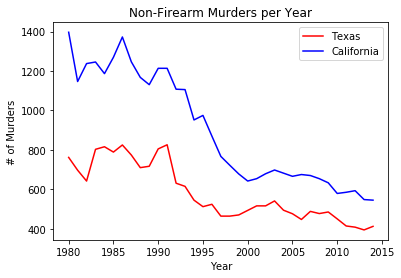

In [683]:
# Call yearly_count helper on TX and CA dataframes
tx_count = yearly_count(non_tx_weapon_crimes)
ca_count = yearly_count(non_ca_weapon_crimes)

# Plot non-firearm murders per year for TX and CA
plt.plot(tx_count['Year'], tx_count['Count'], color = "red", label = "Texas")
plt.plot(ca_count['Year'], ca_count['Count'], color = "blue", label = "California")

# Graph labels and legend
plt.ylabel('# of Murders')
plt.xlabel('Year')
plt.title('Non-Firearm Murders per Year')
plt.legend()
plt.show()

This graph depicts the number of non-firearm murders in both California and Texas from the years 1980 to 2015. For every single year, California has more non-firearm murders than Texas. Both states follow a relatively similar trend in amount of murders per year, wihch could be attributed to political and social factors. While California's population is a few million greater than Texas', it's clear that firearm laws don't have a significant impact on murders. The difference in both Texas and California's populations and death levels are completely unproportional, with the most recent numbers in 2015 having over approximately 100 million more deaths in California than Texas.

### 1.3: Total Victims by Year 

In [4]:
# Group TX and CA dataframes by year and sum victim counts
tx_grouped = tx_weapon_crimes.groupby('Year').sum()
ca_grouped = ca_weapon_crimes.groupby('Year').sum()

tx_grouped = tx_grouped.drop(columns = ['Record ID', 'Incident', 'Victim Age', 'Is_Firearm']).reset_index()
ca_grouped = ca_grouped.drop(columns = ['Record ID', 'Incident', 'Victim Age', 'Is_Firearm']).reset_index()

# Plot victims for TX and CA
plt.plot(tx_grouped['Year'], tx_grouped['Victim Count'], color = "red", label = "Texas")
plt.plot(ca_grouped['Year'], ca_grouped['Victim Count'], color = "blue", label = "California")

plt.ylabel('# of Victims')
plt.xlabel('Year')
plt.title('Firearm victims per Year')
plt.legend()
plt.show()

NameError: name 'tx_weapon_crimes' is not defined

This plot shows the number of firearm victims per year in Texas and California. There is no clear trend in gun-related deaths/injuries for either state and on any time span both states will surpass each other. This leads to the conclusion that gun laws have little effect on victims of gun violence. The numbers appear to be extremely unpreditcable and constantly changing, which allows for uncertainty. This heats up the gun violence debate, with both parties having their own defense, based upon these numbers, thus far.

### 1.4: Total Crimes by Year 

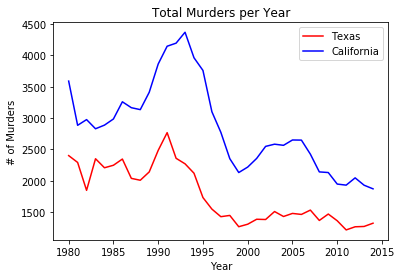

In [685]:
# Call yearly_count helper function on TX and CA dataframes. yearly_count returns the # of murders per year for each dataframe
tx_count = yearly_count(texas_crime)
ca_count = yearly_count(ca_crime)

# Plot murders per year for Texas and California
plt.plot(tx_count['Year'], tx_count['Count'], color = "red", label = "Texas")
plt.plot(ca_count['Year'], ca_count['Count'], color = "blue", label = "California")

# Labels and legend
plt.ylabel('# of Murders')
plt.xlabel('Year')
plt.title('Total Murders per Year')
plt.legend() 
plt.show()


### 1.5: Texas and California Conclusion
1.1: California has more murders committed both with and without guns than Texas does. Also, California has almost the same amount of murders committed without a gun as Texas has of murders committed with a gun. This makes it clear that there is no major effect of gun laws when using these two states as the sample size.

1.2: This graph displays the number of murders committed without a weapon in California and Texas. California is ahead of Texas by a large margin in each year, especially between 1980-1990. During this span, both states endured meteoric rises in total murders by year.

1.3: Comparing the number of victims (deaths) per year between California and Texas. In almost every year, California has more murders than Texas.

1.4: Comparing the total number of murders reported between California and Texas. Once again, California has many more murders per year than Texas does. This hurts the pro-gun control side of the debate heavily.

1.5: California and Texas follow a similar trend of spikes and declines in murders per year. This is likely a result of sociological and political factors. Both states are extremely large and are both populated by many different people; therefore, this is an extremely volatile statistic.

# Part 2: Suicide Rates 

Next, we explore the suicide rates between the 3 most lenient gun law states (Texas, Florida, and Georgia), and the 3 most strict gun law states (California, New Jersey, and New York).

### 2.1: Data Preparation

In [686]:
# Load and clean suicide dataset
suicide = pd.read_csv("suicide.csv")
suicide = suicide.reset_index()
suicide = suicide.drop(columns = ['index',"Notes", 'Year.1', 'State', 'Population', 'Crude', 'Rate'])
suicide.columns = ['Year', 'State', 'Total Deaths', 'Population', 'Crude Rate']
suicide = suicide.query('Year > 2005')
suicide = suicide[(suicide.State.isin(["Texas","Florida","Georgia", "New Jersey", "New York", "California"]))]
suicide["Is_Strict"] = suicide.apply(lambda row: is_strict(row), axis = 1)
suicide

,Year,State,Total Deaths,Population,Crude Rate,Is_Strict
361,2006,California,3323,36021202,9.2,0
366,2006,Florida,2426,18166990,13.4,1
367,2006,Georgia,921,9155813,10.1,1
387,2006,New Jersey,583,8661679,6.7,0
389,2006,New York,1325,19104631,6.9,0
...,...,...,...,...,...,...
978,2018,Florida,3564,21299325,16.7,1
979,2018,Georgia,1569,10519475,14.9,1
999,2018,New Jersey,778,8908520,8.7,0
1001,2018,New York,1720,19542209,8.8,0


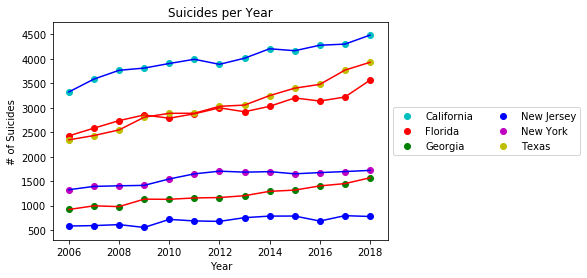

In [687]:
colors = itertools.cycle(["c", "r", "g", "b", "m", "y"])

# Plot suicides by year for each of the 6 states
seen = []
for i, txt in enumerate(suicide.State):
    state = str(suicide['State'].iat[i])
    if state in seen:
        plt.scatter(suicide['Year'].iat[i], suicide['Total Deaths'].iat[i], color = next(colors))
        
    else:
        plt.scatter(suicide['Year'].iat[i], suicide['Total Deaths'].iat[i], color = next(colors), label = suicide['State'].iat[i])
    seen.append(suicide['State'].iat[i])

# Labels and legends for suicides graphical representation
connect_dots(suicide) 
plt.legend(loc="center left",ncol = 2, bbox_to_anchor = (1,.5))
plt.ylabel("# of Suicides")
plt.xlabel("Year")
plt.title("Suicides per Year")
plt.show()

### 2.2: Suicide Rates Conclusion
The states that are known as lenient in terms of gun control have red lines connecting them, and states that are known as strict have blue lines connecting them. Relative to each state's population, it seems that states with easy access to weapons and lenient gun laws have a higher suicide rate than states with strict gun laws. These figures are somewhat proportional, whereas murder rate was not (comparing only Texas and California), because if someone is willing to go to the lengths to kill someone, they most likely will desregard any laws preventing them from acquiring a weapon to do this. This doesn't tell the complete story of suicides, as there are many other factors to consider for each state (access to mental health services, public health resources, etc.), but certainly shows that access to a firearm makes a noticeable impact on the number of suicides.

Further reading on gun access and suicide rates: https://www.hsph.harvard.edu/means-matter/means-matter/risk/

# Part 3: Mass Shootings 

Finally, we will compare mass shootings from strict and lenient states between the years 2015-2017.

### 3.1: Data Preparation 

In [688]:
# Load and clean mass shooting data
m = pd.read_csv("/Users/nickcarrolli/Downloads/gun-violence-database/mass_shootings_all.csv")

for i, row in m.iterrows():
    date = row['Incident Date']
    date = date.split(' ')[2]
    m.at[i, 'Incident Date'] = date

m = m.drop(columns = ['City Or County', 'Address', 'Operations'])
m = m[(m.State.isin(["California","Texas","Illinois", "New York", "Pennsylvania", "Michigan", "Massachusetts", "New Jersey", "Virginia", "Missouri", "Georgia"]))]

m.columns = ['Year', 'State', '# Killed', '# Injured']
grouped = m.groupby('State').sum()
grouped

,# Killed,# Injured
State,,
California,59,228
Georgia,28,84
Illinois,33,211
Massachusetts,2,13
Michigan,16,54
Missouri,13,48
New Jersey,3,40
New York,10,90
Pennsylvania,20,66


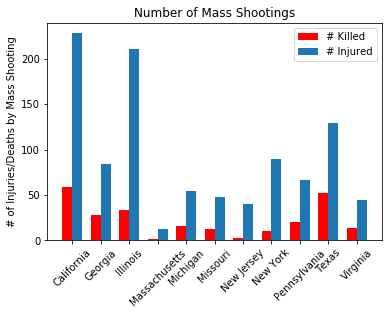

In [689]:
labels = grouped.index

# Count number killed and number injured from the cleaned dataset
num_killed = [i for i in grouped["# Killed"]]
num_injured = [i for i in grouped["# Injured"]]
pos = np.arange(len(labels))

width = 0.35  # the width of the bars

# Plot number injured and number killed for each state 
fig, ax = plt.subplots()
rects1 = ax.bar(pos - width/2, num_killed, width, label='# Killed', color = "red")
rects2 = ax.bar(pos + width/2, num_injured, width, label='# Injured')
ax.set_ylabel('# of Injuries/Deaths by Mass Shooting')
ax.set_title('Number of Mass Shootings')
ax.set_xticks(pos)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()
plt.show()

### 3.2: Mass Shootings Conclusion:
Texas and Georgia have relatively low mass shooting numbers compared to much smaller states like Illinois, Virginia, and Michigan. Despite Texas' massive population, their mass shooting numbers are comparable to states with much less people. There are various possible factors for something such as this to occur, including criminals being deterred away from crime when upstanding citizens  

States with lenient gun laws (Georgia, Texas, and Missouri) have comparable or more mass shootings than states with stricter gun laws. States with strict gun laws like Massachusetts have an extremely low number of people killed/injured in mass shootings. This can be due to a number of factors such as a smaller population and the attitude towards guns by the general population. An interesting factor to consider in this case would be mass shootings per capita which would take into consideration differences in population size in each state.

Further reading on the effects of open/concealed carry on mass shootings: https://www.rand.org/research/gun-policy/analysis/concealed-carry/mass-shootings.html

# Part 4: Linear Regression

### 4.1: Data Preparation 

We start by creating the linear regression model for total number of murders committed per year. 
The dataframe being used displays the number of non-firearm, firearm, and total murders for each year between all states.
We will use 3 different regressions to try and predict the total number of murders in a year:

1) Count associated with year

2) Count associated with year and number of firearm murders

3) Count associated with year and number of non-firearm murders

Using these three factors and splitting the total murders, gun related murders and non gun murders should give us a fresh perspective on how effective America's gun laws truly are.


In [690]:
# Split data into firearm and non-firearm dataframes
firearm =  us_crime.query('Is_Firearm == 1')
non_firearm = us_crime.query('Is_Firearm == 0')

# Get number of firearm related deaths for each year
firearm_data = firearm.copy().groupby(firearm['Year'], as_index=True, group_keys=True).count()
firearm_count = firearm_data[['Record ID']].reset_index()
firearm_count = firearm_count.rename(index=str, columns={'Record ID' : 'Count'})

# Get number of non-firearm related deaths for each year4
non_firearm_data = non_firearm.copy().groupby(non_firearm['Year'], as_index=True, group_keys=True).count()
non_firearm_count = non_firearm_data[['Record ID']].reset_index()
non_firearm_count = non_firearm_count.rename(index=str, columns={'Record ID' : 'Count'})
non_firearm_count

# Merge non-firearm and firearm dataframes
total_count = pd.merge(non_firearm_count, firearm_count, on=['Year'], how = "inner")
total_count = pd.merge(total_count, total, on=['Year'], how = "inner")
total_count.columns = ['Year', 'NonFirearm', 'Firearm', 'Count', 'Pred']
total_count = total_count.drop(columns = ["Pred"])
total_count.head()


,Year,NonFirearm,Firearm,Count
0,1980,8340,14752,23092
1,1981,7672,13536,21208
2,1982,7889,12655,20544
3,1983,7901,11752,19653
4,1984,7191,10902,18093


### 4.2: Linear Regression Model

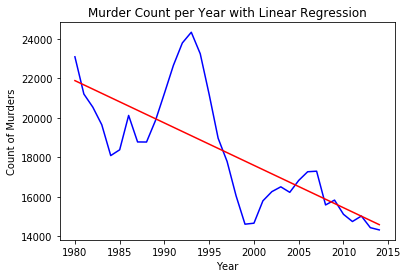

In [691]:
X = total_count['Year'].values.reshape(-1,1)
y = total_count['Count'].values.reshape(-1,1)

reg = LinearRegression().fit(X,y)

preds = reg.predict(X).flatten()
i = 0
for i, j in total_count.iterrows():
    total_count.at[i, 'Pred'] = preds[i]
    i = i+1
    
plt.plot(total_count['Year'], total_count['Count'], color='blue',)
plt.plot(total_count['Year'], total_count['Pred'], color='red')
plt.xlabel("Year")
plt.ylabel("Count of Murders")
plt.title("Murder Count per Year with Linear Regression")
plt.show()
#this regression model will show us the murder count per year. We can clearly see from the graph displayed that 
#between 2007 and 2015, the murder count per year evens out and is a nearly linear decline.

### 4.3: Count Associated with Year

In [692]:
reg1 = ols(formula = 'Count ~ Year', data = total_count).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     38.93
Date:                Sun, 10 May 2020   Prob (F-statistic):           4.78e-07
Time:                        19:03:35   Log-Likelihood:                -315.58
No. Observations:                  35   AIC:                             635.2
Df Residuals:                      33   BIC:                             638.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.464e+05   6.86e+04      6.505      0.000    3.07e+05    5.86e+05
Year        -214.4092     34.364     -6.239      0.000    -284.324    -144.494
==============================================================================
Omnibus:                        6.603   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.211
Skew:                           0.897   Prob(JB):                       0.0739
Kurtosis:                       3.594   Cond. No.                     3.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.4: Count Associated with Year and Firearm Crimes

In [693]:
reg2 = ols(formula = 'Count ~ Year + Firearm', data = total_count).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1708.
Date:                Sun, 10 May 2020   Prob (F-statistic):           3.04e-33
Time:                        19:03:35   Log-Likelihood:                -247.33
No. Observations:                  35   AIC:                             500.7
Df Residuals:                      32   BIC:                             505.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.066e+05   1.16e+04     17.755      0.000    1.83e+05     2.3e+05
Year        -101.1149      5.738    -17.623      0.000    -112.802     -89.427
Firearm        1.1302      0.029     39.365      0.000       1.072       1.189
==============================================================================
Omnibus:                        1.360   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.792
Skew:                          -0.366   Prob(JB):                        0.673
Kurtosis:                       3.083   Cond. No.                     2.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.5: Count Associated with Year and Non-Firearm Crimes

In [694]:
reg3 = ols(formula = 'Count ~ Year + NonFirearm', data = total_count).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.97e-11
Time:                        19:03:35   Log-Likelihood:                -302.26
No. Observations:                  35   AIC:                             610.5
Df Residuals:                      32   BIC:                             615.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.916e+05   1.62e+05     -3.028      0.005   -8.22e+05   -1.61e+05
Year         242.8162     79.317      3.061      0.004      81.253     404.379
NonFirearm     4.0049      0.663      6.044      0.000       2.655       5.355
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.901
Skew:                           0.560   Prob(JB):                        0.387
Kurtosis:                       3.223   Cond. No.                     4.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.6: Linear Regression Conclusion
The model associating murders with year and firearm seems to be the best at predicting the total number of murders in a year. This is because the probability of the f-statistic is by far the smallest in the second model (3.04 x 10^-33). This tells us that the number of firearm murders in a year is more correlated to the total number of murders than non-firearm murders.

# Part 5: Hypothesis Testing

### 5.1: Count Associated with Year 

In [695]:
res = sm.stats.anova_lm(reg1, typ = 2)
res

,sum_sq,df,F,PR(>F)
Year,1.641176e+08,1.0,38.928523,4.779064e-07
Residual,1.391237e+08,33.0,NaN,NaN


### 5.2: Count Associated with Year and Firearm Crimes

In [696]:
res2 = sm.stats.anova_lm(reg2, typ = 2)
res2

,sum_sq,df,F,PR(>F)
Year,2.731722e+07,1.0,310.557580,4.927468e-18
Firearm,1.363090e+08,1.0,1549.637052,1.113879e-28
Residual,2.814780e+06,32.0,NaN,NaN


### 5.3: Count Associated with Year and Non-Firearm Crimes

In [697]:
res3 = sm.stats.anova_lm(reg3, typ = 2)
res3

,sum_sq,df,F,PR(>F)
Year,1.902537e+07,1.0,9.371872,4.438700e-03
NonFirearm,7.416214e+07,1.0,36.532175,9.551857e-07
Residual,6.496160e+07,32.0,NaN,NaN


### 5.4: Hypothesis Testing Conclusion

Between each of the models, the second one seems to be the best at predicting the total number of murders committed. This is because the PR(F) value of the second model is the smallest. As predicted in the previous section, we can say that the the number of firearm murders in a year is most heavily correlated to the total number of murders in a year.

# Part 6: Conclusion 

From this short analysis, we have seen that gun laws have their benefits and their drawbacks but don't completely prevent gun-related crimes from happening. 

Lenient Gun Laws:
Less guns overall, but seem to have more murders and mass shootings. There are many more deaths without use of a firearm because most people do not own a firearm. However, since our model showed that the number of firearm murders is most correlated to the total number of murders, this trend might go down in time.

Strict Gun Laws:
Seem to have a higher suicide rate, however the mass shooting numbers and total number of murders committed seem to be lower in these states. This could be because people who live in states with strict gun laws are cognisant of this fact, and are less likely to commit crimes or go on mass shooting sprees. It's also worth noting that states with more lenient gun laws typically allow its citizens to openly carry or concealed carry which could also explain the fewer number of mass shootings. A more in depth analysis would need to be done to explore the effects on carry laws on the number of gun-related crimes.

This analysis showed that while gun laws have their importance in our society, they will not prevent gun violence from happening. Our study of strict and lenient states shows that restricing access to guns doesn't prevent crime from happening. It's a multifaceted problem that will need to be solved with different public policy methods.

This analysis is a reminder of how powerful data can be; it allows people to make opinions strictly on facts rather than conjecture. In the future, I hope to improve my data science ability to help educate people on what is happening in the world.

# Part 7: Further Reading

Fewer American Kids Die in States With Tougher Gun Laws, According to This New Study:  
https://time.com/5626352/gun-laws-fewer-child-deaths/

States with Strict Gun Laws Have Fewer Firearms Deaths:
https://www.cnbc.com/2018/02/27/states-with-strict-gun-laws-have-fewer-firearms-deaths-heres-how-your-state-stacks-up.html

What Impact Do State Gun Laws Have on Shooting Deaths?:
https://www.cbsnews.com/news/gun-control-laws-state-impact-on-shooting-deaths-suicide-study/

Gun Violence Statistics:
https://lawcenter.giffords.org/facts/gun-violence-statistics/

# Part 8: References

Murder Dataset: https://www.kaggle.com/murderaccountability/homicide-reports/data

Suicide Dataset: https://wonder.cdc.gov/controller/datarequest/D76

Mass Shooting Dataset: https://www.kaggle.com/gunviolencearchive/gun-violence-database#mass_shootings_all.csv

Scorecard of States by Gun Law: https://lawcenter.giffords.org/scorecard/

State Populations: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population